In [1]:
import tellurium as te
import matplotlib.pyplot as plt
import libsbml


# function for plotting the phase portraits of a given model
# specify metabolites_list to analyze a specific set of metabolites
def plot_phase_portraits(model, model_name, simulation, metabolites_list, outpath):
    model_phase_portraits = {}
    used_metabolites = []
    for metabolite in metabolites_list:
        model_phase_portraits[metabolite] = simulation[metabolite]
    for i in metabolites_list:
        for j in metabolites_list:
            if i != j and j not in used_metabolites:
                i_name = model.getSpecies(i).getName()
                j_name = model.getSpecies(j).getName()
                plt.figure()
                plt.title("Comparison between {} and {} [{}]".format(i_name, j_name, model_name))
                plt.xlabel(i_name)
                plt.ylabel(j_name)
                plt.plot(model_phase_portraits[i], model_phase_portraits[j])
                plt.savefig(outpath + "_" + i_name + "_vs_" + j_name + ".png")
                plt.show()
        used_metabolites.append(i)


def plot_pool_transient(simulation, title, phase_tuples, outpath):
    pool = 0
    for coefficient, metabolite in phase_tuples:
        pool += coefficient * simulation[metabolite]
    plt.figure()
    plt.title(title)
    plt.xlabel('t')
    plt.plot(pool)
    plt.savefig(outpath)
    plt.show()


def plot_pool_phase_portrait(simulation, title, phase_tuple1, name1, phase_tuple2, name2, outpath):
    pool1 = 0
    for coefficient, metabolite in phase_tuple1:
        pool1 += coefficient * simulation[metabolite]

    pool2 = 0
    for coefficient, metabolite in phase_tuple2:
        pool2 += coefficient * simulation[metabolite]
    plt.figure()
    plt.title(title)
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.plot(pool1, pool2)
    plt.plot(pool1[0], pool2[0], c='r', label='t=0', marker='.')
    plt.plot(pool1[-1], pool2[-1], c='k', label='t->inf', marker='.')
    plt.savefig(outpath)
    plt.show()


def plot_tiled_phase_portraits(model, model_name, simulation, metabolites_list, outpath):
    model_phase_portraits = {}
    used_metabolites = []
    for metabolite in metabolites_list:
        model_phase_portraits[metabolite] = simulation[metabolite]
    f, axarr = plt.subplots(len(metabolites_list), len(metabolites_list))
    for i in range(len(metabolites_list)):
        for j in range(len(metabolites_list)):
            if i != j and j not in used_metabolites:
                axarr[i, j].plot(model_phase_portraits[metabolites_list[i]], model_phase_portraits[metabolites_list[j]])
    for index, ax in enumerate(axarr.flat):
        x_index = index % len(metabolites_list)
        y_index = index // len(metabolites_list)
        label = model.getSpecies(metabolites_list[x_index]).getName()
        ylabel = model.getSpecies(metabolites_list[y_index]).getName()
        ax.set(xlabel=label, ylabel=ylabel)
        # Hide x labels and tick labels for top plots and y ticks for right plots.
        ax.label_outer()
    plt.savefig(outpath)
    plt.show()


In [2]:
asansm_path = 'xml/iPAE1146_Amino_sugar_and_nucleotide_sugar_metabolism_fbc_squeezed_with_boundaries.xml'
pm_path = 'xml/iPAE1146_Pyrimidine_metabolism_fbc_squeezed_with_boundaries.xml'
lb_path = 'xml/iPAE1146_Lipopolysaccharide_biosynthesis_fbc_squeezed_with_boundaries.xml'
combined_model_path = 'xml/iPAE1146_Combined_Subsystems_fbc_squeezed_with_boundaries.xml'

asansm_libsbml_doc = libsbml.readSBML(asansm_path)
asansm_libsbml = asansm_libsbml_doc.getModel()
asansm_model = te.loadSBMLModel(asansm_path)
asansm_species = [species.getId() for species in asansm_libsbml.getListOfSpecies()]
pm_model = te.loadSBMLModel(pm_path)
pm_libsbml_doc = libsbml.readSBML(pm_path)
pm_libsbml = pm_libsbml_doc.getModel()
pm_species = [species.getId() for species in pm_libsbml.getListOfSpecies()]
lb_model = te.loadSBMLModel(lb_path)
lb_libsbml_doc = libsbml.readSBML(lb_path)
lb_libsbml = lb_libsbml_doc.getModel()
lb_species = [species.getId() for species in lb_libsbml.getListOfSpecies()]
combined_model = te.loadSBMLModel(combined_model_path)
combined_libsbml_doc = libsbml.readSBML(combined_model_path)
combined_libsbml = combined_libsbml_doc.getModel()
combined_species = [species.getId() for species in combined_libsbml.getListOfSpecies()]

speciesId2Name = {species.getId(): species.getName() for species in combined_libsbml.getListOfSpecies()}
speciesName2Id = {species.getName(): species.getId() for species in combined_libsbml.getListOfSpecies()}

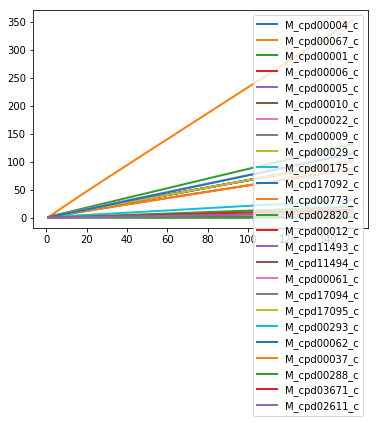

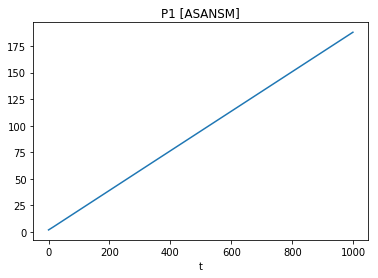

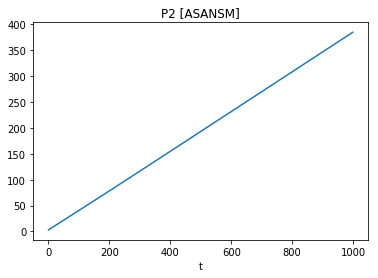

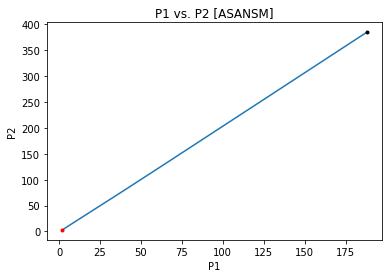

array([ 6.23115238e+35,  3.73247064e+34, -3.31609728e+36, -5.98308924e+35,
       -1.05447085e+34, -1.53604290e+34,  1.99445380e+00,  0.00000000e+00,
       -1.62756372e+34,  1.50084885e+34, -3.05278784e+34, -5.49379125e+36,
        1.05447087e+34, -3.62132354e+20,  2.51090085e+34,  4.85726897e+20,
        4.86315541e+20, -3.46997954e+33,  4.86315541e+20,  4.85726897e+20,
       -9.55712527e+34,  3.35613799e+35, -2.38924918e+34, -2.96945416e+33,
       -2.20784089e+33,  1.96458186e+35])

In [3]:
# ASANSM Simulation

asansm_model.reset()
asansm_simulation = asansm_model.simulate(0, 100, 1000, asansm_species)
asansm_model.plot(asansm_simulation)
# asansm_model.getSteadyStateValues()
# asansm_phase_metabolites = []  # insert the metabolites to be considered in the phase portraits

# plot_phase_portraits(asansm_libsbml, "ASANSM", asansm_simulation, asansm_phase_metabolites, "plots/asansm")

# Choose two conservation and a disequilibrium pool
asansm_conservation_pool1 = [(1, 'NADP'), (1, 'NADPH')]
asansm_conservation_pool1 = [(coeff, speciesName2Id[species]) for coeff, species in asansm_conservation_pool1]

asansm_conservation_pool2 = [(1, 'NAD'), (1, 'H2O'), (1, 'Acetate')]
asansm_conservation_pool2 = [(coeff, speciesName2Id[species]) for coeff, species in asansm_conservation_pool2]

# 3. Disequilibrium
pass

# Plot it
plot_pool_transient(asansm_simulation, "P1 [ASANSM]", asansm_conservation_pool1, "plots/asansm_pool1.png")
plot_pool_transient(asansm_simulation, "P2 [ASANSM]", asansm_conservation_pool2, "plots/asansm_pool2.png")
plot_pool_phase_portrait(asansm_simulation, "P1 vs. P2 [ASANSM]", asansm_conservation_pool1, "P1",
                         asansm_conservation_pool2, "P2", "plots/asansm_p1vsp2.png")

asansm_model.getSteadyStateValues()

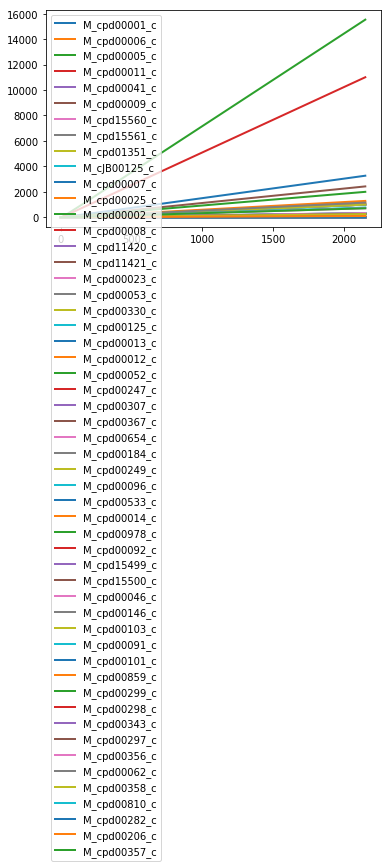

array([ 7.73566924e+20,  1.33333332e+00,  1.81629810e+20,  1.00000000e+00,
        1.81629809e+20, -1.79206536e+20,  8.79778662e+20,  6.07547422e+27,
        1.81629457e+20,  1.30187619e+30,  1.81631085e+20,  0.00000000e+00,
        1.83195382e+02,  2.88776750e+21,  1.99792792e+21,  1.81629812e+20,
        1.00000000e+00,  2.00000206e+00, -2.16857528e-28,  2.00000579e+00,
       -1.84857340e-27,  6.48677894e+20,  6.48627367e+20,  3.63259797e+20,
       -6.53975832e+29,  0.00000000e+00,  1.03788463e+20,  1.03788463e+20,
        1.03788463e+20,  1.03788463e+20,  4.93153284e+19,  3.08970624e+19,
        2.09403278e+20,  6.99040351e+19,  0.00000000e+00,  1.83195368e+02,
        0.00000000e+00,  4.16663267e+19, -1.79206536e+20,  1.81647741e+20,
        2.00749156e+20,  6.41144171e-01,  1.35885726e+00,  7.02609663e+19,
        5.86933916e+18, -2.42327447e+18,  3.43344427e+19,  7.78418718e+19,
        2.13150535e+20,  5.44383661e+19, -8.47266069e+14,  6.53975832e+29,
        5.33108680e+18,  

In [4]:
# PM Simulation
pm_model.reset()
pm_simulation = pm_model.simulate(0, 1000, 1000, pm_species)
pm_model.plot(pm_simulation)

# Choose two conservation and a disequilibrium pool
pm_conservation_pool1 = [(1, 'Ubiquinone-8'), (1, 'Ubiquinol-8')]
pm_conservation_pool1 = [(coeff, speciesName2Id[species]) for coeff, species in pm_conservation_pool1]

pm_conservation_pool2 = [(-1, 'H+'), (-1, "H2O"), (-2, "L-Aspartate"), (1, "trdox"), (1, "L-Glutamate"),
                         (-2, "NH3"), (-1, "PPi"), (-1, "Cytosine"), (-1, "Uracil"), (1, "Orotidylic acid")]
pm_conservation_pool2 = [(coeff, speciesName2Id[species]) for coeff, species in pm_conservation_pool2]
# 3. Disequilibrium
pass

#Plot it
pass

pm_model.getSteadyStateValues()

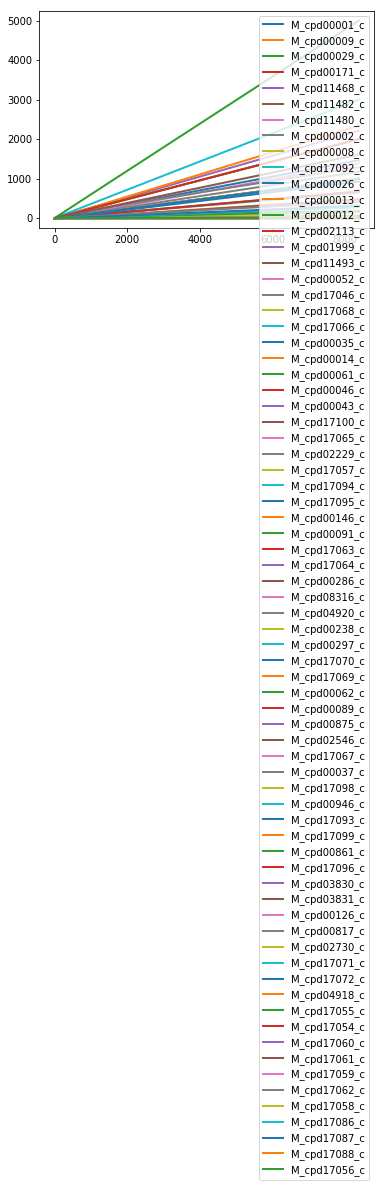

array([ 1.23676921e+21,  2.16273381e+20,  7.38369677e+19,  1.47673935e+20,
        1.47667824e+20,  3.34487511e+20,  1.52734175e+11,  2.21510903e+20,
        1.84592419e+20,  2.95347871e+20,  9.52707069e+19,  2.41008988e+19,
        3.59763963e+20,  2.95347871e+20,  9.99963010e-01,  1.72455791e-23,
        6.40592354e+09,  2.34615746e-21,  1.80150111e+20,  1.42857143e-01,
        4.43021801e+20,  9.99981505e-01,  1.47673935e+20, -6.16295690e-22,
        2.95347871e+20,  9.99981505e-01,  7.66330354e+17,  1.83520732e-05,
        9.52351422e-08,  1.47673962e+20,  1.71856561e+10,  1.46141275e+20,
        9.99981505e-01,  7.38369677e+20,  5.86086776e-22,  2.98062933e-21,
        2.38769876e+20,  9.99999857e-01,  7.39999957e+00,  2.31999860e+01,
        1.00003699e+00,  2.70213282e+09,  1.42857143e-01,  9.94471626e+19,
        9.94971128e+19,  5.63928476e-14,  9.99963010e-01,  1.42857143e-01,
        6.64010442e+18,  2.15230534e+19,  2.08738325e+18,  1.42995374e+20,
        3.91223050e+18,  

In [5]:
# LB Simulation
lb_model.reset()
lb_simulation = lb_model.simulate(0, 1000, 1000, lb_species)
lb_model.plot(lb_simulation)

# Choose two conservation and a disequilibrium pool
lb_conservation_pool1 = [(1, '(R)-3-Hydroxydecanoyl-[acyl-carrier protein]'),
                         (1, '2-hydroxydodecanoyl-[acyl-carrier protein]'),
                         (1, 'ACP'), (1, 'D-3-Hydroxydodecanoyl-[acp]'), (1, 'Dodecanoyl-ACP')]
lb_conservation_pool1 = [(coeff, speciesName2Id[species]) for coeff, species in lb_conservation_pool1]

lb_conservation_pool2 = [(1, '3-Deoxy-D-manno-octulosonate8-phosphate'), (1, 'ATP'),
                         (1, 'D-Glycero-D-manno-heptose1-7-bisphosphate'), (-1, 'D-Glycero-D-manno-heptose1-phosphate'),
                         (2, 'PA_core7_lipidA'), (1, 'Phosphate'), (2, 'Phosphoenolpyruvate'),
                         (1, 'Pseudomonas aeruginosa Lipid A precursor')]
lb_conservation_pool2 = [(coeff, speciesName2Id[species]) for coeff, species in lb_conservation_pool2]

# 3. Disequilibrium
pass
#Plot it


lb_model.getSteadyStateValues()

# plot_phase_portraits(lb_model, lb_simulation)

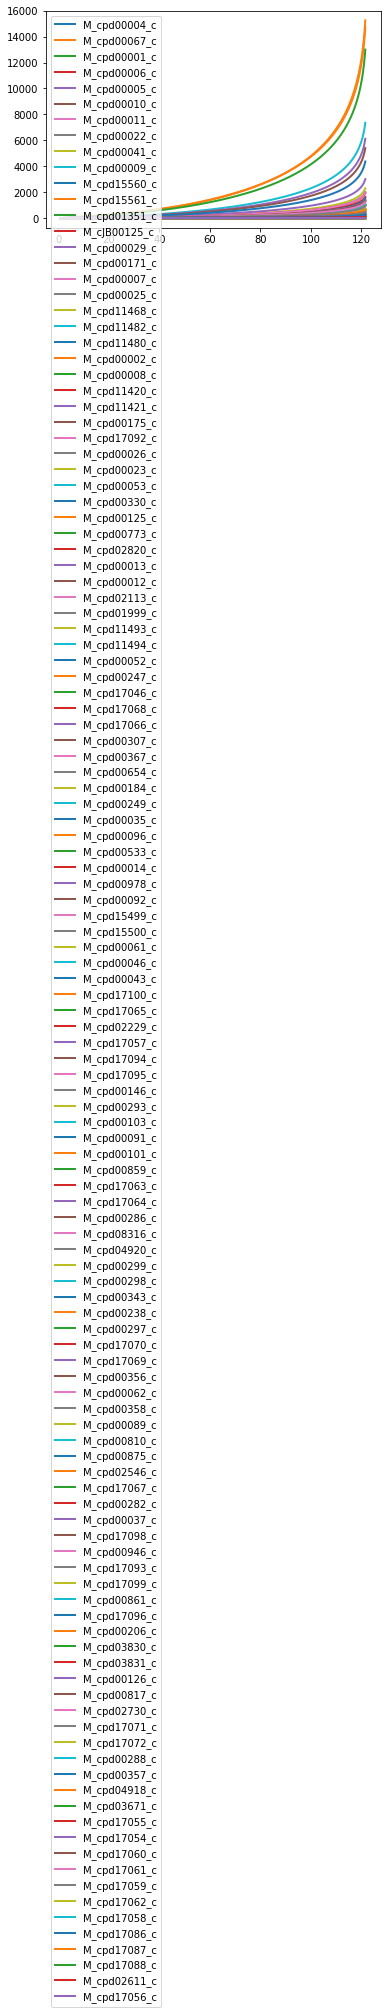

array([ 4.43727147e+020, -3.22172667e+027,  5.34496688e+024,
        1.21478912e+019,  8.45265230e+023, -4.05057228e+012,
        2.00005485e+000,  1.99796719e+000,  7.04307536e-026,
        2.01917495e-003, -1.99742000e+025,  2.97605448e+020,
        2.97606814e+020,  2.96301647e+020,  2.96300257e+020,
       -3.89341705e+024,  2.96927150e+020,  6.89611385e-004,
        1.99930977e+000,  2.55921177e+023,  4.46036169e+020,
        7.41813914e+020,  5.36511181e+024,  4.77891318e+024,
       -7.47343535e+013,  1.00000000e+000, -1.49763143e+021,
        9.17072580e+026,  6.31925083e+022,  1.99989667e+000,
        5.21574239e-026,  2.00001806e+000,  0.00000000e+000,
       -1.47569125e+020,  1.69678638e+003,  1.67357748e+023,
        1.29976422e+024, -1.76380723e+016,  5.66963145e-031,
       -4.47465263e+020, -7.54201196e+026,  3.19095789e+023,
       -8.19160841e-321,  1.41065169e+023,  1.28934903e+018,
        9.83385303e+023,  0.00000000e+000,  2.63832032e+020,
        2.63832032e+020,

In [6]:
# Combined Simulation
combined_model.reset()
combined_model_simulation = combined_model.simulate(0, 1000, 1000, combined_species)
combined_model.plot(combined_model_simulation)

combined_model.getSteadyStateValues()

# plot_phase_portraits(combined_model, combined_model_simulation)

